文如其人是一个成语，指文章的风格同作者的性格特点相似，通过文本就能了解一个人的思想、立场和世界观。

我们使用的用 迈尔斯布里格斯类型(MBTI人格)标注的数据集。

![](img/mbti.png)

一共有4个维度，每个维度有两个类型，所以常人的性格从MBTI指标来看，一共有16种性格。

### 读取数据
mbti数据集中有两个字段
- type: 性格类型
- posts: 每个用户的最近的50条推文，推文与推文之间用``|||`` 间隔开

先查看前5行数据

In [9]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('data/mbti.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
type     8675 non-null object
posts    8675 non-null object
dtypes: object(2)
memory usage: 135.7+ KB


mbti数据集一共有8675条数据
### 数据探索
这里我计算出每个推文的长度（没啥大用，复习apply和seaborn可视化）

In [11]:
df['words_per_comment'] = df['posts'].apply(lambda x: len(x.split()))/50
df['posts'] = df['posts'].apply(lambda x:x.lower())
df.head()

,type,posts,words_per_comment
0,INFJ,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,11.12
1,ENTP,'i'm finding the lack of me in these posts ver...,23.40
2,INTP,'good one _____ https://www.youtube.com/wat...,16.72
3,INTJ,"'dear intp, i enjoyed our conversation the o...",21.28
4,ENTJ,'you're fired.|||that's another silly misconce...,19.34


小提琴图show一下各个性格的words_per_comment信息

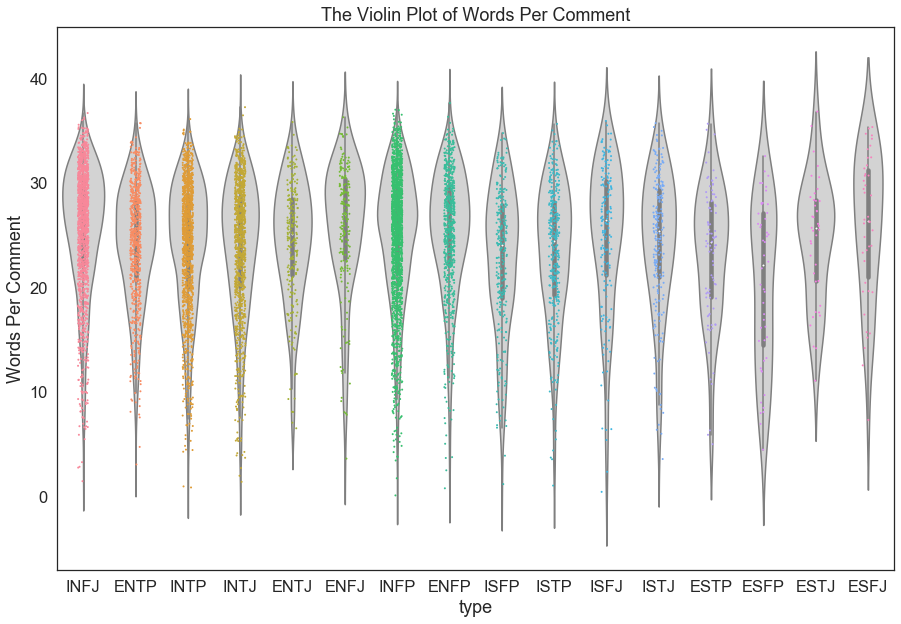

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

#画布设置及尺寸
sns.set(style='white', font_scale=1.5)
plt.figure(figsize=(15, 10))

#绘制小提琴图
sns.violinplot(x='type',
              y='words_per_comment',
              data=df,
              color='lightgray')
#绘制分类三点图，叠加到小提琴图图层上方
sns.stripplot(x='type', 
              y='words_per_comment', 
              data=df, 
              size=2,
              jitter=True)

#标题及y轴名
plt.title('The Violin Plot of Words Per Comment', size=18)
plt.ylabel('Words Per Comment')
#显示
plt.show()

### 分割数据
将数据集分为训练集和测试集

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['posts'], df['type'], 
                                                    test_size=0.2,
                                                    random_state=123)

### 文本向量化
机器不理解文本，需要先编码为数字，这里使用tfidf方法进行编码。不熟悉的可以看看这个介绍

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

### 训练模型及模型得分
这里我只以LogisticRegression为例子

In [20]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(X_train, y_train)
model1.score(X_test, y_test)

0.6357348703170029

In [21]:
from sklearn.linear_model import SGDClassifier

model2 = SGDClassifier()
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

0.6824207492795389

In [22]:
from sklearn.linear_model import Perceptron

model3 = Perceptron()
model3.fit(X_train, y_train)
model3.score(X_test, y_test)

0.5994236311239193

找到的这个数据集标注的可能有问题，如果是经典的数据集，一般跑出来都能达到80+%的准确率。
